<h1 style="text-align: center; font-weight: bold;">Student Depression Analysis</h1>

<div style="text-align: right;">
    TOURNIER Quentin<br>
    OULD ALI Walid
</div>


The dataset used : [Student Depression Dataset](https://www.kaggle.com/datasets/hopesb/student-depression-dataset)

This analysis is based on a dataset comprising **27,901 records** and **18 columns**, providing a comprehensive look into the factors that influence student depression. The dataset includes a wide range of features, such as:

### Demographic Details
- Gender  
- Age  
- City  
- Profession  

### Psychological and Lifestyle Factors
- Academic Pressure  
- Work Pressure  
- Sleep Duration  
- Dietary Habits  
- Study Satisfaction  
- Job Satisfaction  
- Financial Stress  

Additionally, the dataset provides critical information on mental health history, including whether students have ever experienced suicidal thoughts and details about their degree or field of study.

### Target Variable
The target variable, **Depression**, is a binary column indicating whether a student is suffering from depression.

### Objective
This analysis aims to uncover patterns and identify potential risk factors associated with student depression. By exploring relationships between lifestyle habits, academic pressures, and mental well-being, this study seeks to provide valuable insights into the factors affecting students' mental health.

# *Import libraries*

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# *Load the dataset*

In [136]:
url = "https://gist.githubusercontent.com/QuentinTournier40/14b290ebe3414e38f50c04a3e2fc6665/raw/8ae8c7772d880ca63d05ee0a9324bb24fa457c2f/student_depression"

data=pd.read_csv(url)
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# *Basic Info and Data Types*

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

#  *Summary Statistics*

In [138]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


# *Data types and unique value counts*

In [139]:
print("\nData types:\n", data.dtypes)


Data types:
 id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [140]:
print("\nUnique Values Count:\n", data.nunique())


Unique Values Count:
 id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64


# *Missing value analysis*

In [141]:
print(data.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


There are only 3 missing values in the **Financial stress** fields.\
We decided to fill in these data with the median values of the other financial stress values.

In [142]:
data['Financial Stress'].fillna(data['Financial Stress'].median(), inplace=True)
data.isnull().sum()

/tmp/ipykernel_401/2041053707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Financial Stress'].fillna(data['Financial Stress'].median(), inplace=True)


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

# *Feature distribution analysis*

### *Gender Distribution*

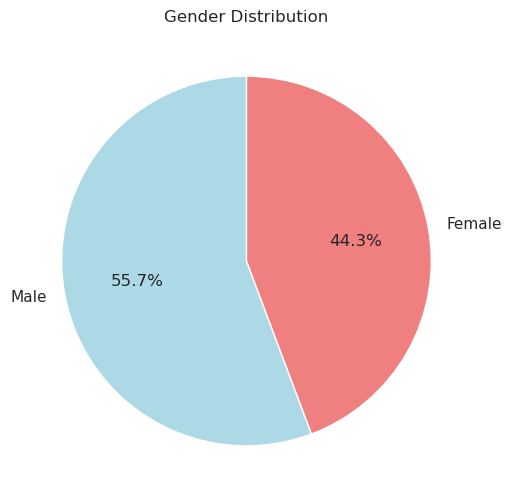

In [143]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# *Numerical Feature Distributions*

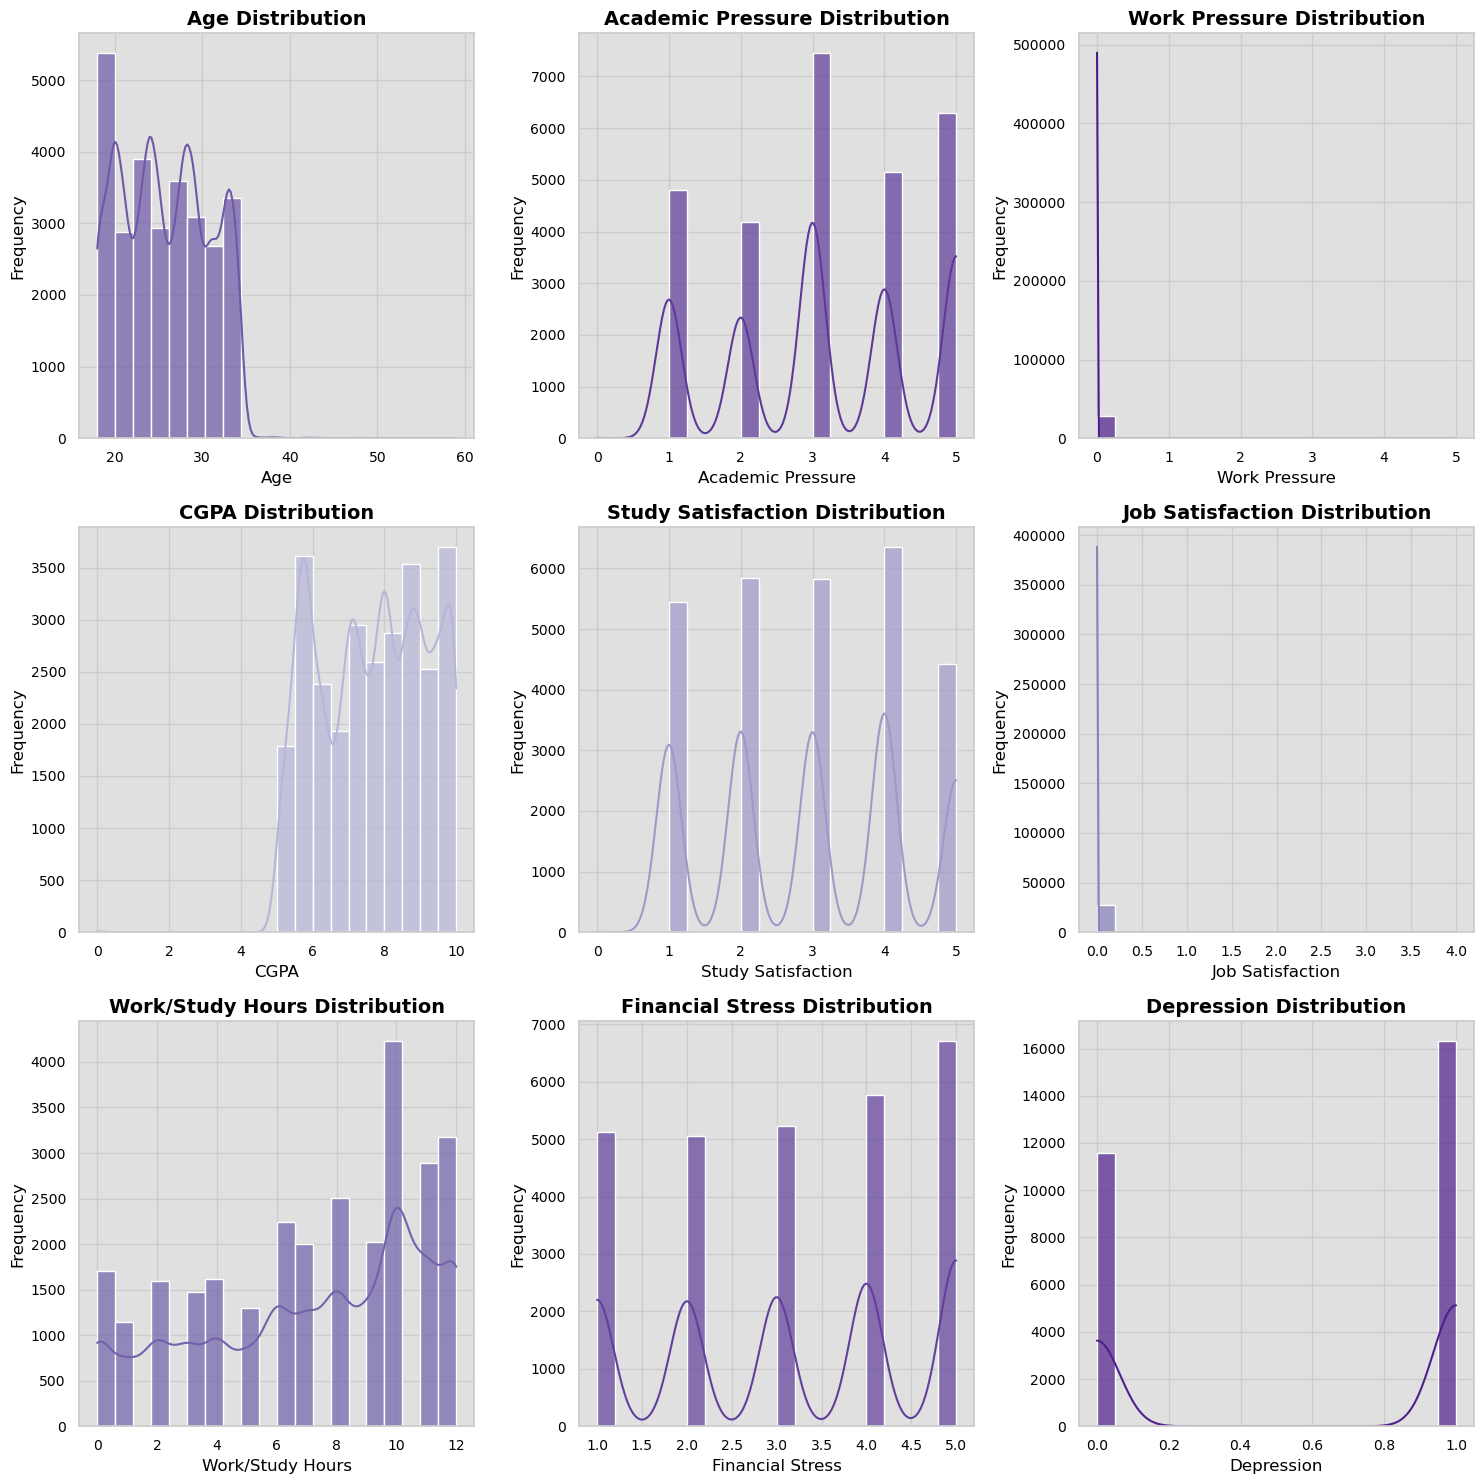

In [144]:
# Get numerical columns and exclude 'id'
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']

num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Art
sns.set(style="darkgrid")
colors = sns.color_palette("Purples", num_cols)
dark_colors = sns.color_palette("Purples", 10)[7:10]
colors[:3] = dark_colors

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, bins=20, color=colors[i], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, color='black')
    axes[i].set_ylabel('Frequency', fontsize=12, color='black')
    axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[i].set_facecolor('#e0e0e0')


for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# *Categorical Features Distribution*

/tmp/ipykernel_401/2883771445.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=axes[i], palette=colors)
/tmp/ipykernel_401/2883771445.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, ax=axes[i], palette=colors)
/tmp/ipykernel_401/2883771445.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=axes[i], palette=colors, order=data[col].value_counts().iloc[:10].index)  # Top 10 cities only
/tmp/ipykernel_401/2883771445.py:18: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.co

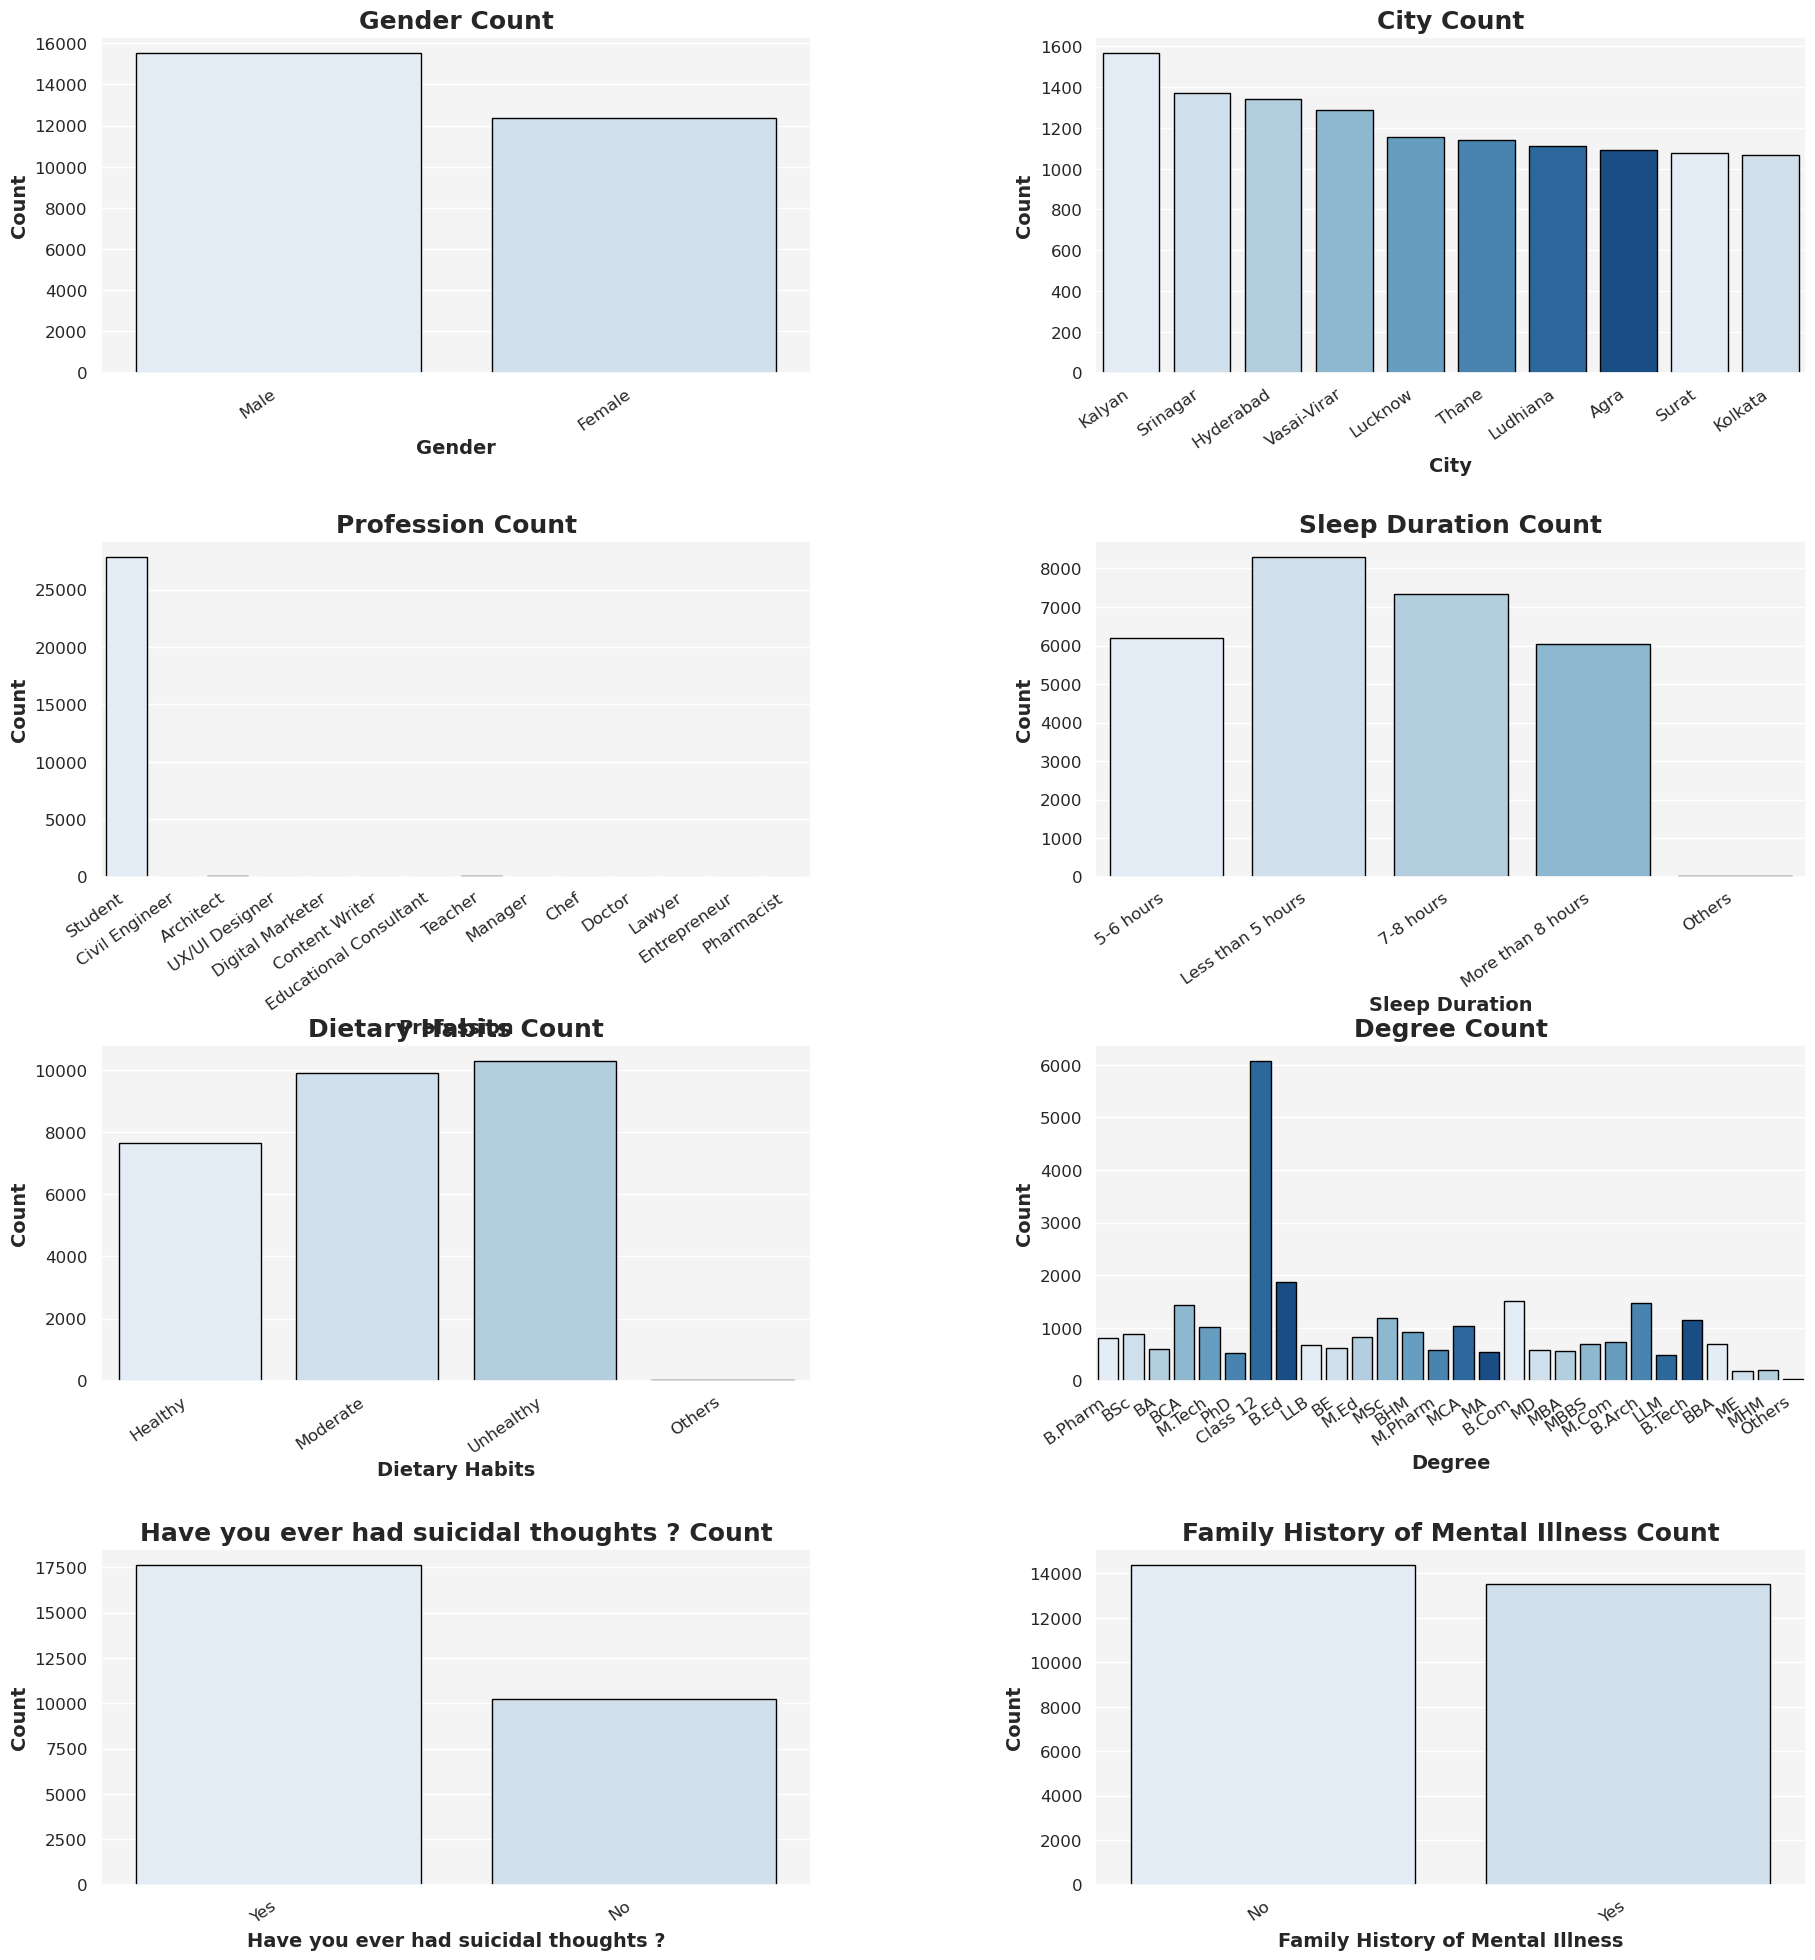

In [145]:
# Get categorical columns and exclude 'id'
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col.lower() != 'id']

num_cols = 2  # Two plots per row
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(22, 6 * num_rows))
axes = axes.flatten()

# Art
sns.set(style="whitegrid")
colors = sns.color_palette("Blues", n_colors=8)

for i, col in enumerate(categorical_columns):
    # Increase the size of the "City" plot for better readability
    if col.lower() == 'city':
        sns.countplot(data=data, x=col, ax=axes[i], palette=colors, order=data[col].value_counts().iloc[:10].index)  # Top 10 cities only
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
    else:
        sns.countplot(data=data, x=col, ax=axes[i], palette=colors)
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
    
    axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')
    
    axes[i].tick_params(axis='x', rotation=35, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

    for label in axes[i].get_xticklabels():
        label.set_horizontalalignment('right')

    for bar in axes[i].patches:
        bar.set_edgecolor('black')

    axes[i].set_facecolor('#f4f4f4')

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()


# *Correlation analysis*

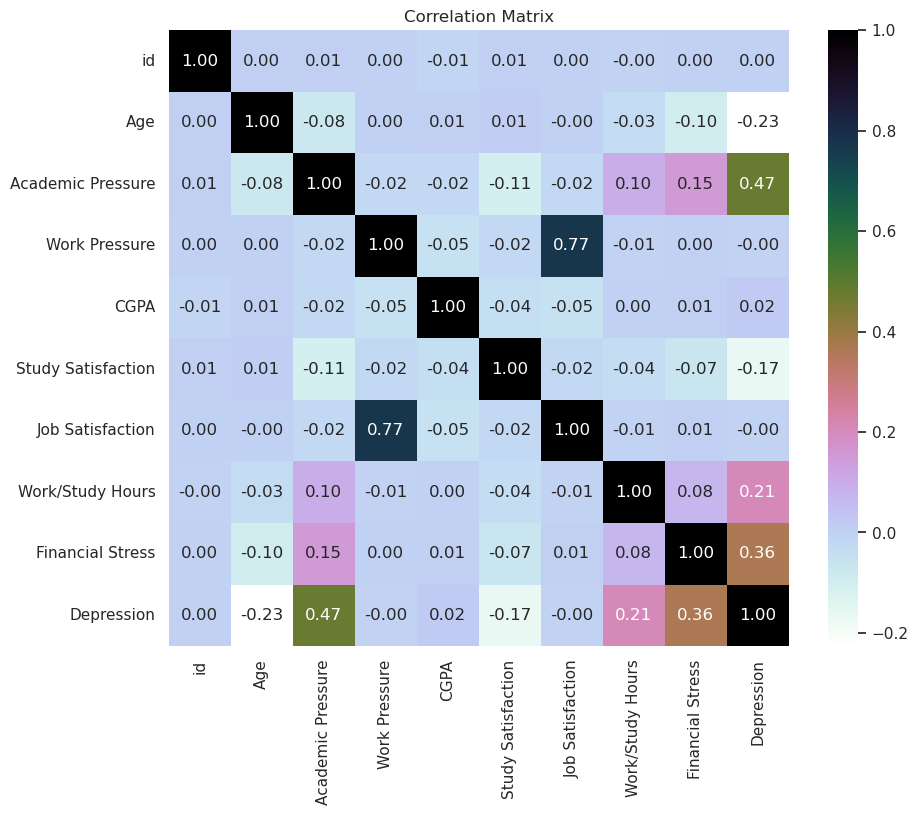

In [146]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix_r', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Academic Pressure (0.47 correlation with Depression)
There is a moderate positive correlation between academic pressure and depression. This suggests that students experiencing high academic pressure are more likely to report symptoms of depression.

### Suicidal Thoughts (0.55 correlation with Depression)
This is the highest positive correlation in the matrix, indicating that students who have had suicidal thoughts are significantly more likely to experience depression.

### Financial Stress (0.36 correlation with Depression)
Financial stress is also positively correlated with depression, showing that students struggling financially may be at a higher risk of mental health issues.

### Work/Study Hours (0.21 correlation with Depression)
While not as strong as the previous factors, there is still a noticeable correlation. This might suggest that longer work/study hours could contribute to increased stress and mental health issues.

### Study Satisfaction (-0.17 correlation with Depression)
A weak negative correlation suggests that students who are more satisfied with their studies are slightly less likely to experience depression.

### Age (-0.23 correlation with Depression)
A mild negative correlation indicates that younger students may be more prone to depression compared to older students.
Other Observations:

### Work Pressure (0.00 correlation with Depression)
Surprisingly, work pressure does not seem to have a direct correlation with depression in this dataset.

### Job Satisfaction (0.00 correlation with Depression)
Similar to work pressure, job satisfaction does not appear to influence depression significantly.

# *Outlier detection*

In [147]:
def detect_outliers_iqr(df, numerical_columns):
    outliers = {}
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

numerical_columns = data.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']  # Exclude 'id'

numerical_outliers = detect_outliers_iqr(data, numerical_columns)

print(f"Outliers detected in columns:")
for col, outlier_data in numerical_outliers.items():
    print(col)

Outliers detected in columns:
Age
Academic Pressure
Work Pressure
CGPA
Study Satisfaction
Job Satisfaction
Work/Study Hours
Financial Stress
Depression


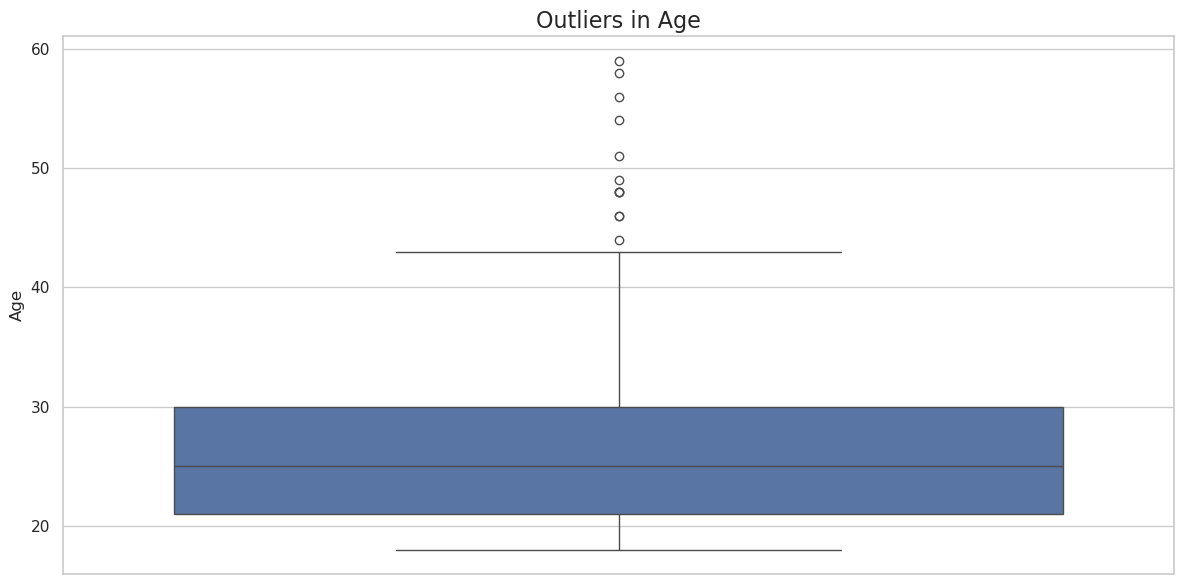

In [148]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Age"])
plt.title('Outliers in Age', fontsize=16)
plt.tight_layout()
plt.show()

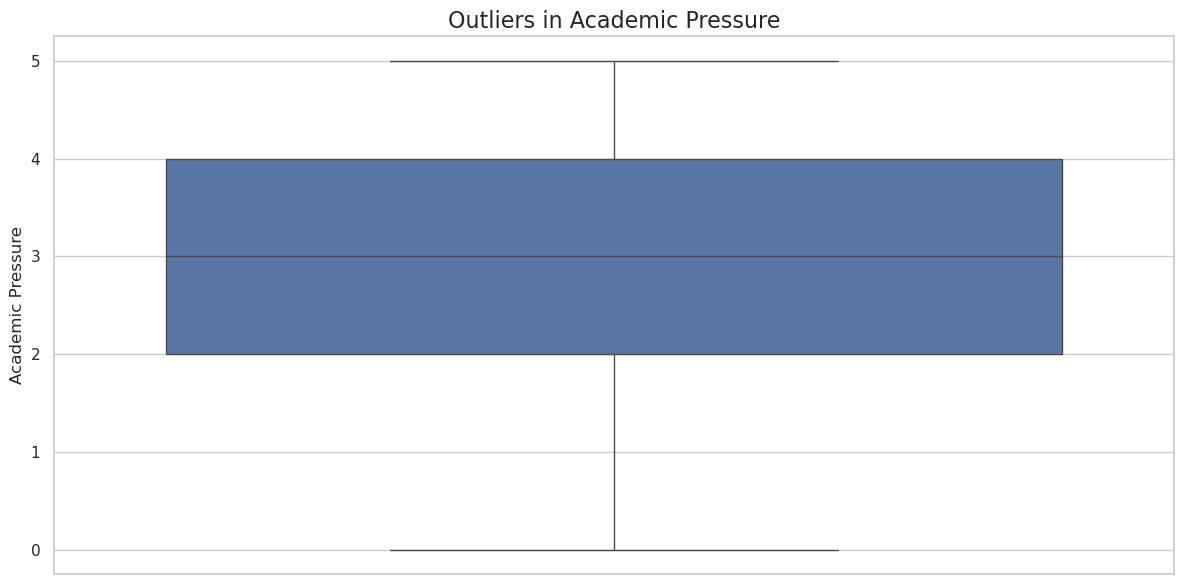

In [149]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Academic Pressure"])
plt.title('Outliers in Academic Pressure', fontsize=16)
plt.tight_layout()
plt.show()

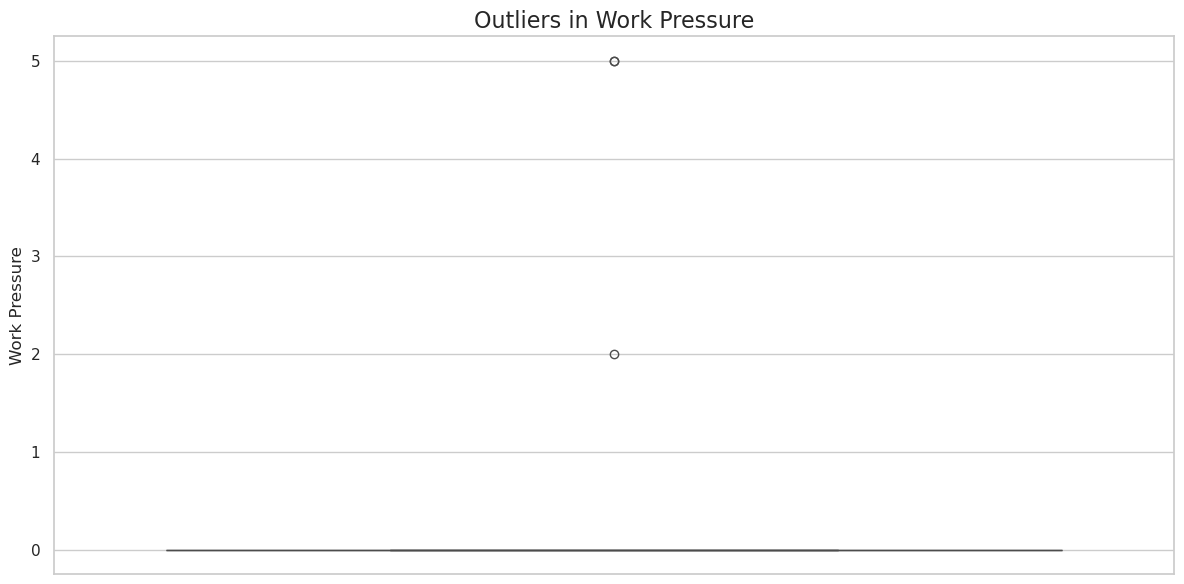

In [150]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Work Pressure"])
plt.title('Outliers in Work Pressure', fontsize=16)
plt.tight_layout()
plt.show()

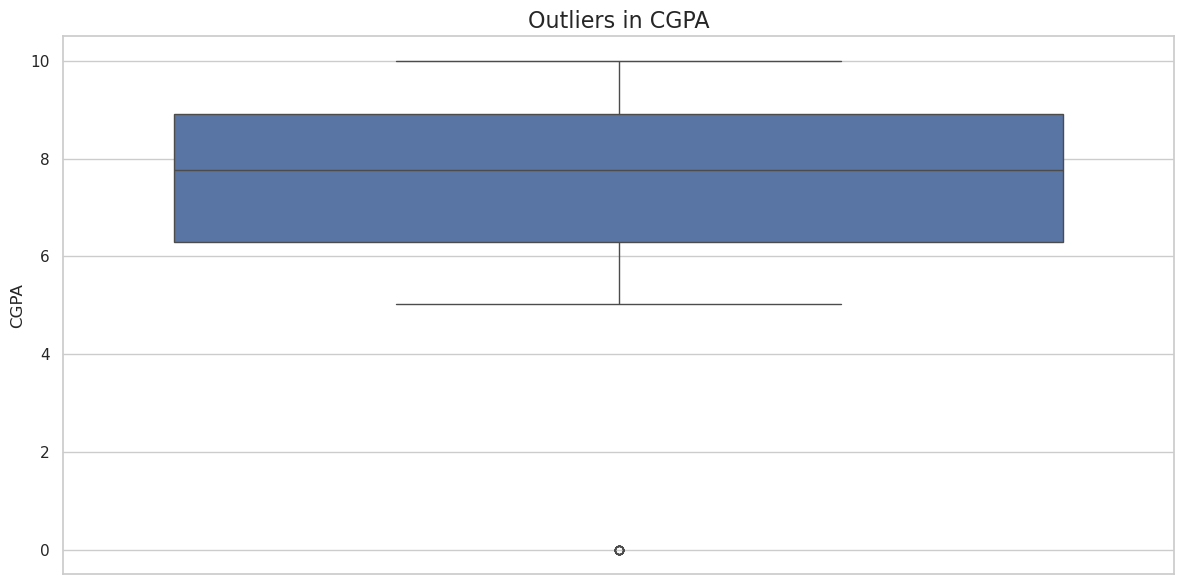

In [151]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["CGPA"])
plt.title('Outliers in CGPA', fontsize=16)
plt.tight_layout()
plt.show()

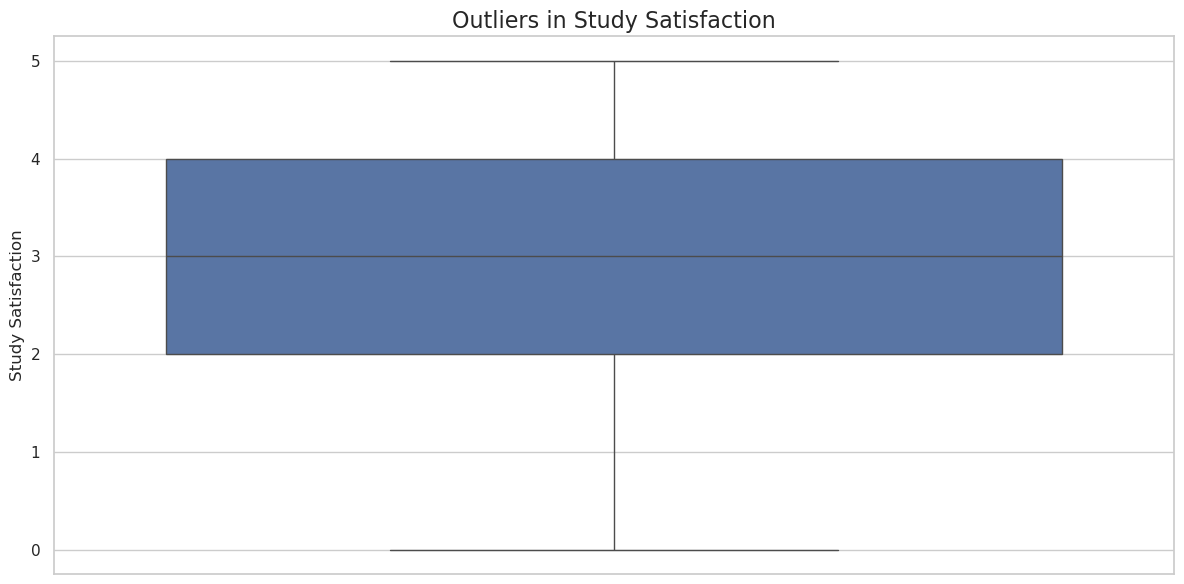

In [152]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Study Satisfaction"])
plt.title('Outliers in Study Satisfaction', fontsize=16)
plt.tight_layout()
plt.show()

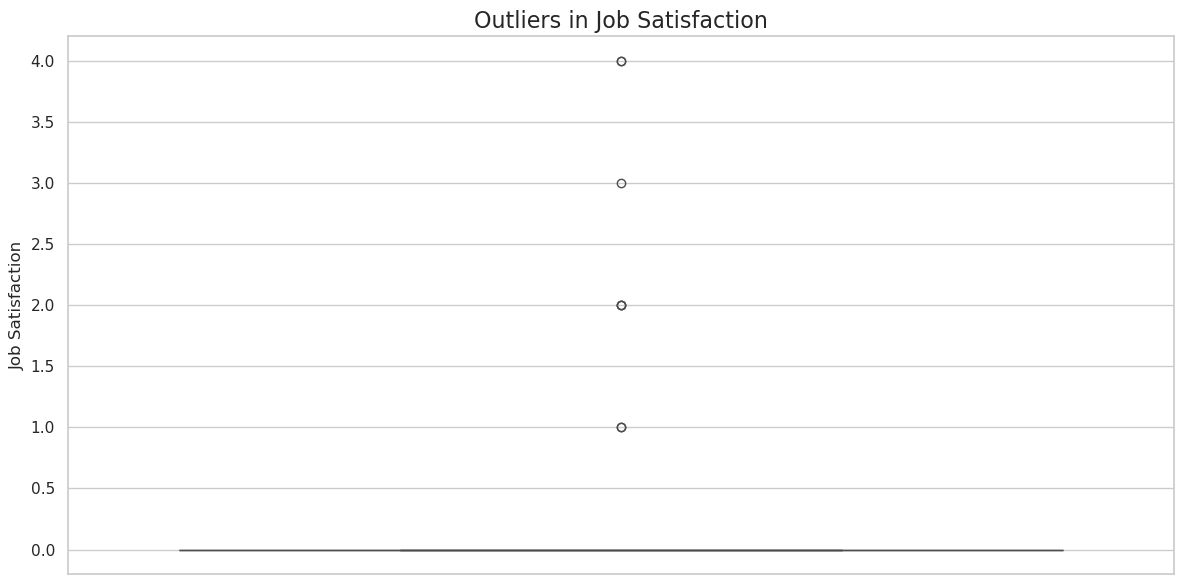

In [153]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Job Satisfaction"])
plt.title('Outliers in Job Satisfaction', fontsize=16)
plt.tight_layout()
plt.show()

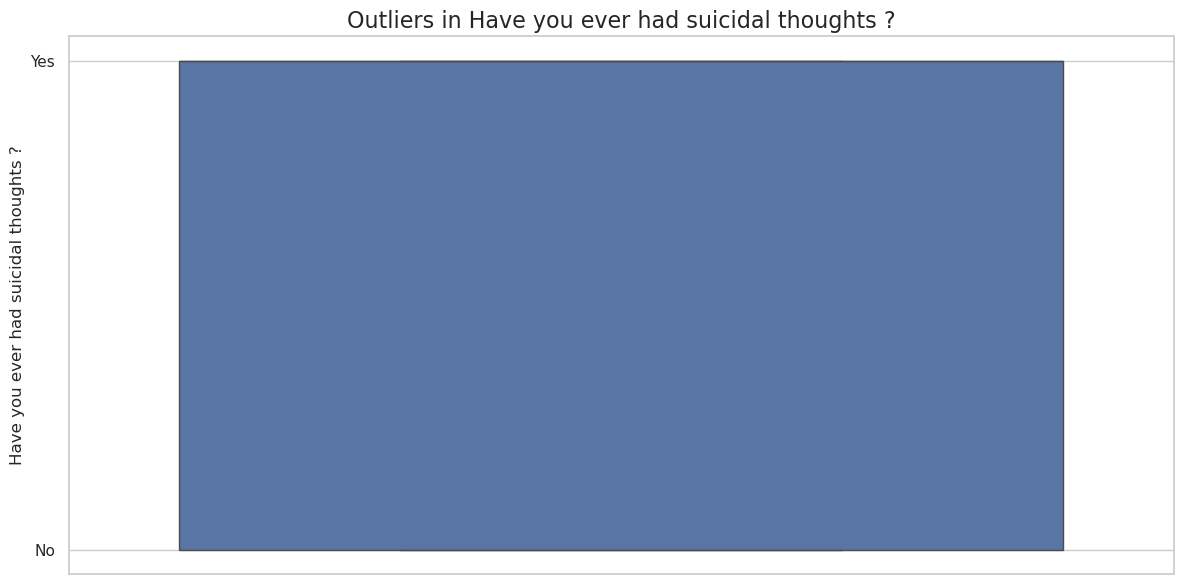

In [154]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Have you ever had suicidal thoughts ?"])
plt.title('Outliers in Have you ever had suicidal thoughts ?', fontsize=16)
plt.tight_layout()
plt.show()

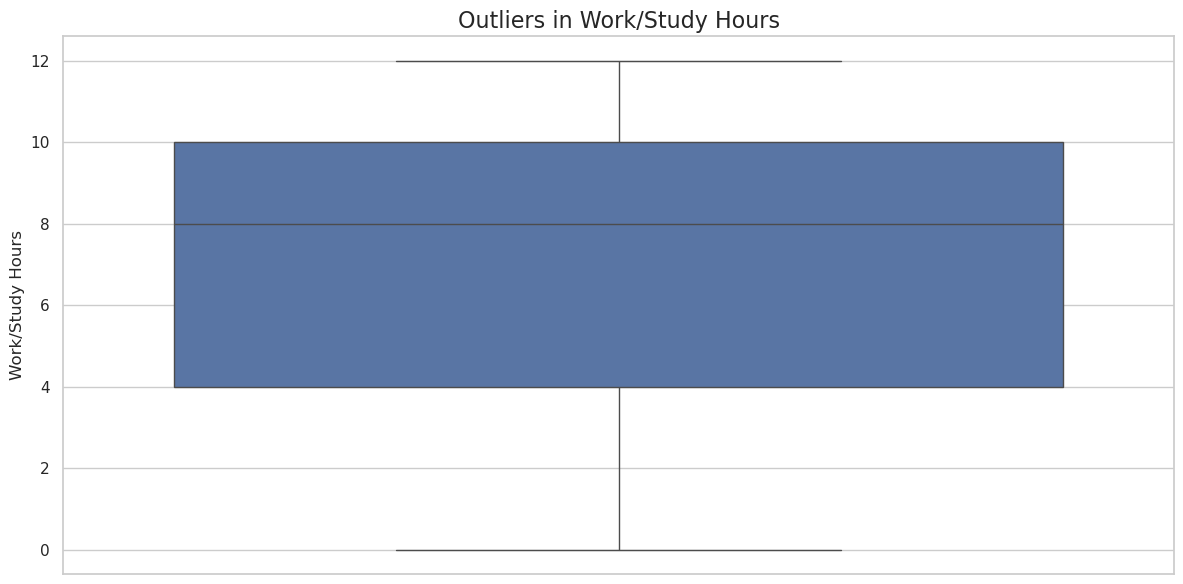

In [155]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Work/Study Hours"])
plt.title('Outliers in Work/Study Hours', fontsize=16)
plt.tight_layout()
plt.show()

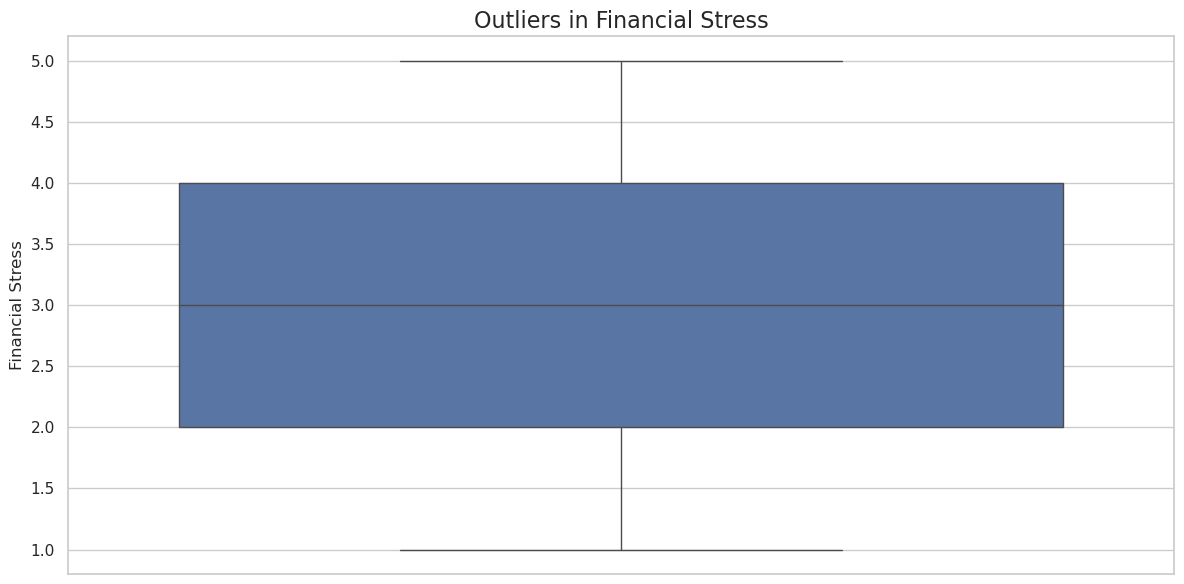

In [156]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Financial Stress"])
plt.title('Outliers in Financial Stress', fontsize=16)
plt.tight_layout()
plt.show()

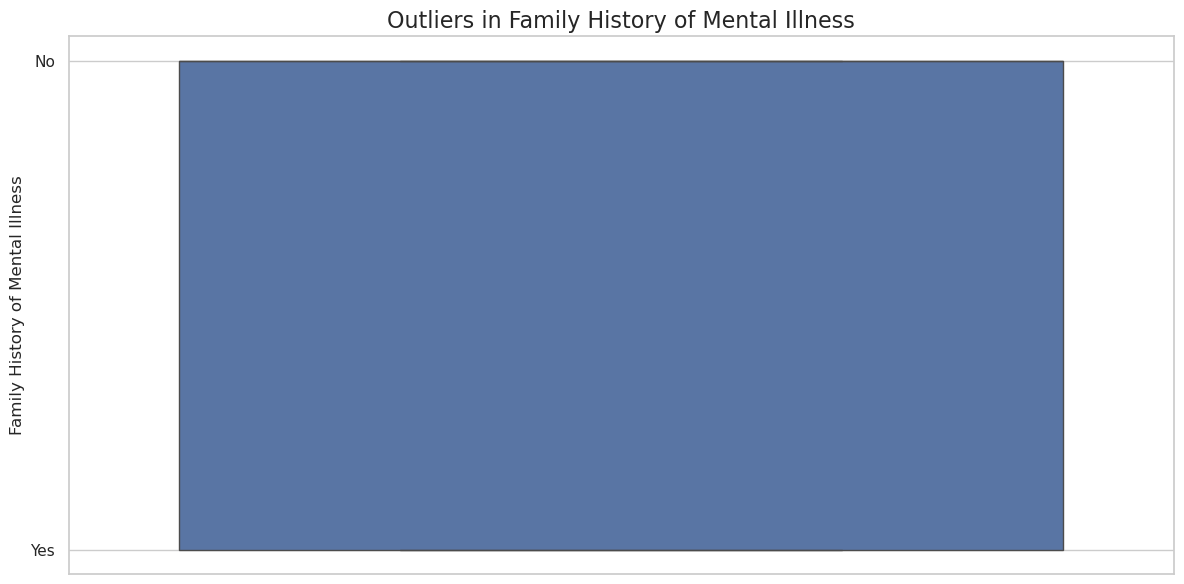

In [157]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Family History of Mental Illness"])
plt.title('Outliers in Family History of Mental Illness', fontsize=16)
plt.tight_layout()
plt.show()

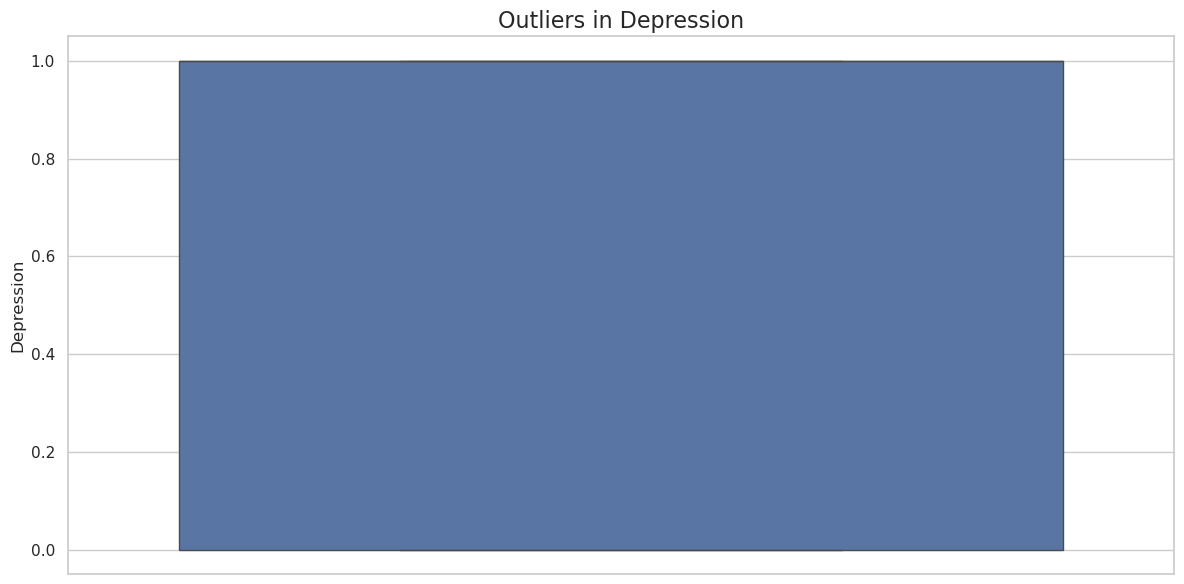

In [158]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data["Depression"])
plt.title('Outliers in Depression', fontsize=16)
plt.tight_layout()
plt.show()

Mainly, all the numericals data are good. But on the **Age**, we can see some outliers.

# *Data scaling*

In [159]:
numerical_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

df_scaled = pd.DataFrame(scaled_data, columns=numerical_columns)

df_scaled.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
0,1.463165,1.345543,-0.009777,0.893393,-0.693425,-0.01534,-1.121213,-1.488857
1,-0.371474,-0.826104,-0.009777,-1.194076,1.510636,-0.01534,-1.121213,-0.793081
2,1.055467,-0.102222,-0.009777,-0.425724,1.510636,-0.01534,0.497095,-1.488857
3,0.443921,-0.102222,-0.009777,-1.404862,-0.693425,-0.01534,-0.851495,1.294246
4,-0.167625,0.621660,-0.009777,0.322229,0.041262,-0.01534,-1.660650,-1.488857


# *Encode categorical variables*

In [160]:
# Binary Encoding
binary_columns = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0}) 
data.head()         

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0


In [161]:
# Ordinal encoding 
ordinal_mapping = {
    'Sleep Duration': {'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4, 'Others': 0},
    'Dietary Habits': {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3, 'Others': 0}
}

for col, mapping in ordinal_mapping.items():
    data[col] = data[col].map(mapping)

data

data.head()    

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,2,3,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,2,2,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,1,3,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,3,2,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,2,2,M.Tech,1,1.0,1.0,0,0


# *Droping unnecessary columns*

In [162]:
df = data.drop(columns =  ['id','Profession','Degree','Work Pressure','City', 'Gender', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress'])
df.head()

,Age,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
0,33.0,2,3,1,0,1
1,24.0,2,2,0,1,0
2,31.0,1,3,0,1,0
3,28.0,3,2,1,1,1
4,25.0,2,2,1,0,0


# *Concatenate Scaled Data with Encoded Data*

In [163]:
df_final = pd.concat([df_scaled, df], axis=1)

df_final.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Age,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
0,1.463165,1.345543,-0.009777,0.893393,-0.693425,-0.01534,-1.121213,-1.488857,33.0,2,3,1,0,1
1,-0.371474,-0.826104,-0.009777,-1.194076,1.510636,-0.01534,-1.121213,-0.793081,24.0,2,2,0,1,0
2,1.055467,-0.102222,-0.009777,-0.425724,1.510636,-0.01534,0.497095,-1.488857,31.0,1,3,0,1,0
3,0.443921,-0.102222,-0.009777,-1.404862,-0.693425,-0.01534,-0.851495,1.294246,28.0,3,2,1,1,1
4,-0.167625,0.621660,-0.009777,0.322229,0.041262,-0.01534,-1.660650,-1.488857,25.0,2,2,1,0,0


# *Splitting the dataset*

In [164]:
X = df_final.drop(columns=['Depression'])  # Features
y = df_final['Depression']  # Target

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")
X_train.head()

Training Set: (22320, 13), Testing Set: (5581, 13)


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Age,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness
1657,-1.594566,0.621660,-0.009777,-1.112481,-1.428112,-0.01534,-1.121213,1.294246,18.0,3,2,1,0
24995,-0.167625,-0.102222,-0.009777,-0.874496,-0.693425,-0.01534,0.497095,-1.488857,25.0,3,2,0,1
27613,0.851619,-0.102222,-0.009777,1.076981,-0.693425,-0.01534,-0.581777,1.294246,30.0,3,1,1,1
13512,1.667013,-0.102222,-0.009777,-0.194539,1.510636,-0.01534,1.306249,-0.097305,34.0,3,2,1,0
27029,-0.167625,-0.102222,-0.009777,-0.126543,0.775949,-0.01534,1.036531,1.294246,25.0,2,1,0,0


# **Machine Learning Model**

### *RandomForest*

In [166]:
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest.fit(X_train, y_train)
y_pred_random_forest = model_random_forest.predict(X_test)

# Predict and evaluate
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f"Accuracy: {accuracy_random_forest:.2f}")

# Cross validation
cv_scores_random_forest = cross_val_score(model_random_forest, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores: ", cv_scores_random_forest)
print(f"Mean Accuracy: {cv_scores_random_forest.mean():.2f} ± {cv_scores_random_forest.std():.2f}")

Accuracy: 0.84
Cross-Validation Scores:  [0.83407991 0.84175627 0.8344086  0.83763441 0.84103943]
Mean Accuracy: 0.84 ± 0.00


### *LogisticRegression*

In [167]:
model_logistic_regression = LogisticRegression(random_state=42)
model_logistic_regression.fit(X_train, y_train)
y_pred_logistic_regression = model_logistic_regression.predict(X_test)

# Predict and evaluate
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print(f"Accuracy: {accuracy_logistic_regression:.2f}")

# Cross validation
cv_scores_logistic_regression = cross_val_score(model_logistic_regression, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores: ", cv_scores_logistic_regression)
print(f"Mean Accuracy: {cv_scores_logistic_regression.mean():.2f} ± {cv_scores_logistic_regression.std():.2f}")

Accuracy: 0.84
Cross-Validation Scores:  [0.84160545 0.8516129  0.84318996 0.84498208 0.85286738]
Mean Accuracy: 0.85 ± 0.00


### *KNeighbors*

In [168]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Predict and evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.2f}")

# Cross validation
cv_scores_knn = cross_val_score(model_knn, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores: ", cv_scores_knn)
print(f"Mean Accuracy: {cv_scores_knn.mean():.2f} ± {cv_scores_knn.std():.2f}")

Accuracy: 0.82
Cross-Validation Scores:  [0.81956639 0.82043011 0.80663082 0.82132616 0.82043011]
Mean Accuracy: 0.82 ± 0.01


# *ROC*

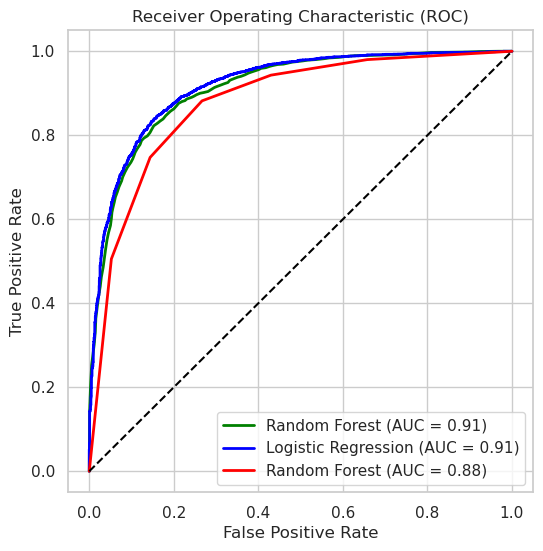

In [169]:
# ROC Curve
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, model_random_forest.predict_proba(X_test)[:,1])
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

fpr_logistic_regression, tpr_logistic_regression, _ = roc_curve(y_test, model_logistic_regression.predict_proba(X_test)[:,1])
roc_auc_logistic_regression = auc(fpr_logistic_regression, tpr_logistic_regression)

fpr_knn, tpr_knn, _ = roc_curve(y_test, model_knn.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_random_forest, tpr_random_forest, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_random_forest:.2f})')
plt.plot(fpr_logistic_regression, tpr_logistic_regression, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_random_forest:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# *Feature importance*

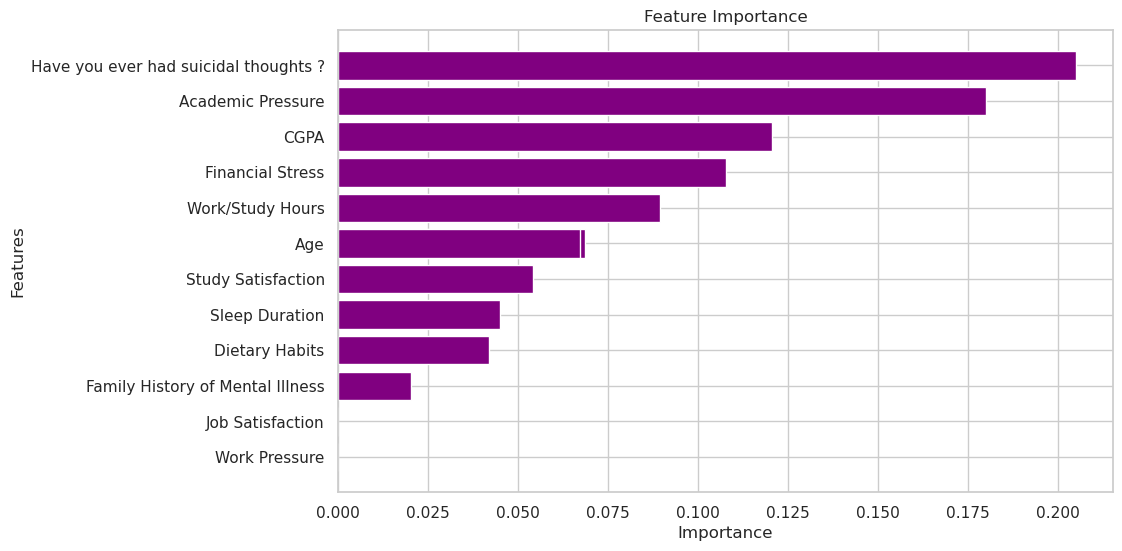

In [170]:
# Feature importance
importance = model_random_forest.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Bar Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


# *Hyperparameter*

In [173]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.8456093189964158
